## LSTM

This notebook is meant to set up an LSTM for predicting load.

In [8]:
#!/usr/bin/env python
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from lstm import LSTM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
data = pd.read_csv("../src/data/8.4_cleaned.csv", parse_dates = ["date"]).fillna(0)
#data = data.iloc[::10]
data.head(2)

,date,airTemp,GHI,PAI,L,PV
0,2021-03-18 00:00:00,0.0,0.0,0.0,129.75000,0.0
1,2021-03-18 00:10:00,0.0,0.0,0.0,127.40625,0.0


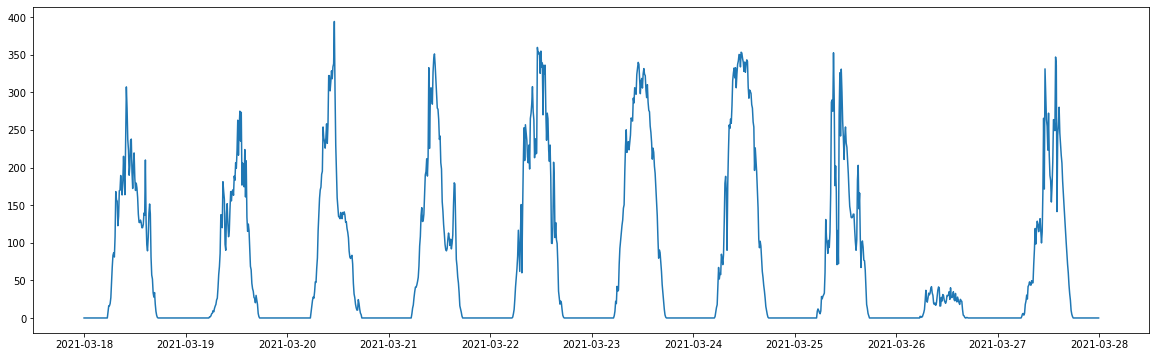

In [10]:
plt.figure(figsize = (20, 6))
plt.plot(data.date, data.PV)
plt.show()

In [42]:
lstm = LSTM("../src/data/8.4_cleaned.csv", "PV", ["GHI", "airTemp", "time"], 5, 12, lstm_nodes= 60, sample_rate = 1, clean =False)

Prepared data with the following variables: ['PV', 'GHI', 'airTemp', 'time']
Shape of train set (2304, 5, 4), shape of test set (560, 5, 4).

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60)                15600     
_________________________________________________________________
dense_9 (Dense)              (None, 48)                2928      
Total params: 18,528
Trainable params: 18,528
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
36/36 - 2s - loss: 1.2293 - val_loss: 0.7867
Epoch 2/100
36/36 - 0s - loss: 0.1571 - val_loss: 0.0671
Epoch 3/100
36/36 - 0s - loss: 0.0458 - val_loss: 0.0454
Epoch 4/100
36/36 - 0s - loss: 0.0347 - val_loss: 0.0386
Epoch 5/100
36/36 - 0s - loss: 0.0297 - val_loss: 0.0248
Epoch 6/100
36/36 - 0s - loss: 0.0258 - val_loss: 0.0296
Epoch 7/100
36/36 - 0s - loss: 0.0235 - val_loss: 0.0274
Epoch 8/100
36/36 - 0s - loss: 0.0230 - val_loss: 0.0292
Epoch 9/100
36/36 - 0s - loss: 0.0230 - val_loss: 0.0284
Epoch 10/100
36/36 - 0s - loss: 0.0229 - val_loss: 0.0286

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.05000000074505806.
Epoch 11/100
36/36 - 0s - loss: 0.0203 - val_loss: 0.0276
Epoch 12/100
36/36 - 0s - loss: 0.0202 - val_loss: 0.0271
Epoch 13/100
36/36 - 0s - loss: 0.0201 - val_loss: 0.0268
Epoch 14/100
36/36 - 0s - loss: 0.0201 - val_loss: 0.0265
Epoch 15/100
36/36 - 0s - loss: 0.0201 - val_loss: 0.0264

Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.

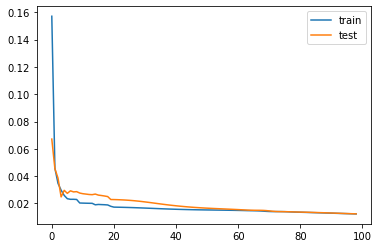

In [43]:
lstm.train_model(epochs = 100, verbose = 2)
lstm.plot_training_history()

(560, 5)


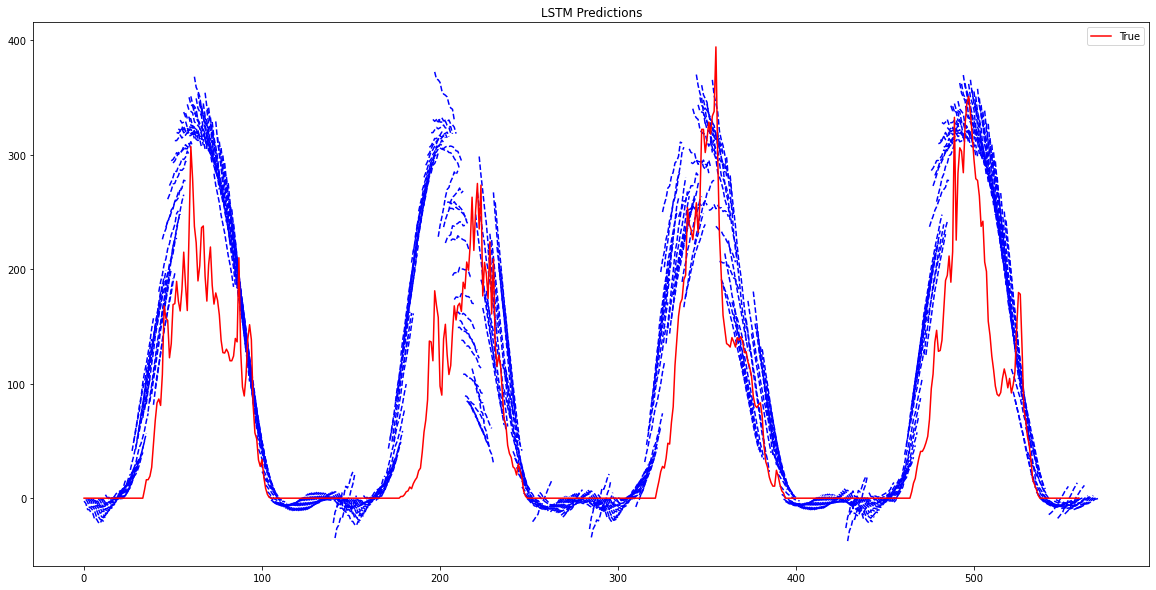

In [41]:
yhat = lstm.predict_on_test_set()
lstm.plot_test_set(yhat, 7000, plot_every=1)


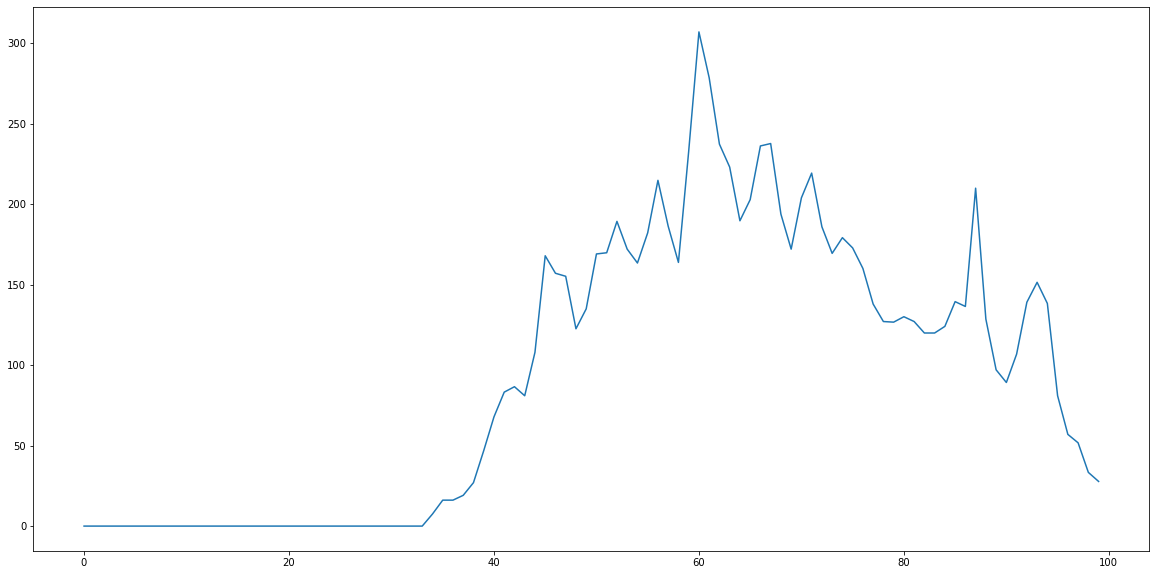

In [23]:
plt.figure(figsize=(20,10))
plt.plot(range(100), data["PV"][:100])

In [898]:
yhat.shape

(8909, 15)

In [1]:
from lstm import LSTM